# Airbnb Berlin

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import sklearn

from pandas.plotting import scatter_matrix

In [3]:
df_raw = pd.read_csv('~/Desktop/ttp2/capstone_4/berlin_listings_detailed.csv')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

/Users/Marwin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1]:
#df_raw.shape
#df_raw.describe()
#df_raw.info()

NameError: name 'df_raw' is not defined

In [5]:
df_raw.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20200514190820,2020-05-15,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ion,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,100%,94%,f,https://a0.muscache.com/im/pictures/user/21428...,https://a0.muscache.com/im/pictures/user/21428...,Mitte,7.0,7.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.53454,13.40256,f,Guesthouse,Entire home/apt,3,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,""Free street p...",NaN,$60.00,NaN,NaN,$250.00,$30.00,1,$28.00,4,1125,4,59,1125,1125,33.5,1125.0,4 months ago,t,30,60,90,180,2020-05-15,132,7,2016-04-11,2020-04-03,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,7,7,0,0,2.65
1,3176,https://www.airbnb.com/rooms/3176,20200514190820,2020-05-15,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",NaN,NaN,https://a0.muscache.com/im/pictures/243355/84a...,NaN,3718,https://www.airbnb.com/users/show/3718,Britta,2008-10-19,"Coledale, New South Wales, Australia",We love to travel ourselves a lot and prefer t...,NaN,NaN,67%,f,https://a0.muscache.com/im/users/3718/profile_...,https://a0.muscache.com/im/users

In [5]:
#Reassign relevant columns to df 
df = df_raw[['id', 'host_id', 'host_since', 
             'neighbourhood_group_cleansed', 'latitude', 'longitude',
             'property_type', 'room_type', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'accommodates',
             'price']]
df 

,id,host_id,host_since,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,bed_type,guests_included,accommodates,price
0,2015,2217,2008-08-18,Mitte,52.53454,13.40256,Guesthouse,Entire home/apt,1.0,1.0,0.0,Real Bed,1,3,$60.00
1,3176,3718,2008-10-19,Pankow,52.53500,13.41758,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,2,4,$90.00
2,3309,4108,2008-11-07,Tempelhof - Schöneberg,52.49885,13.34906,Apartment,Private room,1.0,1.0,1.0,Pull-out Sofa,1,1,$28.00
3,7071,17391,2009-05-16,Pankow,52.54316,13.41509,Apartment,Private room,1.0,1.0,2.0,Real Bed,1,2,$33.00
4,9991,33852,2009-08-25,Pankow,52.53303,13.41605,Apartment,Entire home/apt,2.5,4.0,7.0,Real Bed,5,7,$180.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24673,43422635,31667990,2015-04-21,Friedrichshain-Kreuzberg,52.50169,13.43058,Apartment,Entire home/apt,1.0,2.0,3.0,Real Bed,1,4,$65.00
24674,43430815,346167573,2020-05-13,Spandau,52.54527,13.20534,Apartment,Private room,1.0,1.0,4.0,Real Bed,1,4,$35.00
24675,43432267,856367,2011-07-23,Treptow - Köpenick,52.48207,13.46962,Apartment,Private room,1.0,1.0,1.0,Real Bed,1,2,$40.00
24676,43436282,226803356,2018-11-21,Treptow - Köpenick,52.45836,13.58493,Camper/RV,Private room,1.5,0.0,0.0,Real Bed,1,2,$46.00


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24678 entries, 0 to 24677
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            24678 non-null  int64  
 1   host_id                       24678 non-null  int64  
 2   host_since                    24657 non-null  object 
 3   neighbourhood_group_cleansed  24678 non-null  object 
 4   latitude                      24678 non-null  float64
 5   longitude                     24678 non-null  float64
 6   property_type                 24678 non-null  object 
 7   room_type                     24678 non-null  object 
 8   bathrooms                     24657 non-null  float64
 9   bedrooms                      24632 non-null  float64
 10  beds                          24466 non-null  float64
 11  bed_type                      24676 non-null  object 
 12  guests_included               24678 non-null  int64  
 13  a

,id,host_id,latitude,longitude,bathrooms,bedrooms,beds,guests_included,accommodates
count,2.467800e+04,2.467800e+04,24678.000000,24678.000000,24657.000000,24632.000000,24466.000000,24678.000000,24678.000000
mean,2.199784e+07,7.825784e+07,52.510111,13.405853,1.103824,1.162634,1.609662,1.363563,2.692520
std,1.262602e+07,8.865735e+07,0.031683,0.059890,0.345119,0.676081,1.218970,0.910202,1.588992
min,2.015000e+03,1.581000e+03,52.340480,13.085630,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.122274e+07,1.110704e+07,52.489103,13.373275,1.000000,1.000000,1.000000,1.000000,2.000000
50%,2.144830e+07,4.000968e+07,52.509740,13.416100,1.000000,1.000000,1.000000,1.000000,2.000000
75%,3.296801e+07,1.189637e+08,52.533117,13.439598,1.000000,1.000000,2.000000,1.000000,3.000000
max,4.343876e+07,3.461676e+08,52.656630,13.758420,8.000000,12.000000,17.000000,24.000000,24.000000


In [7]:
# Identify NaN values and remove

In [8]:
df.isnull().sum()

id                                0
host_id                           0
host_since                       21
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
bathrooms                        21
bedrooms                         46
beds                            212
bed_type                          2
guests_included                   0
accommodates                      0
price                             0
dtype: int64

In [9]:
# Rename 'neighbourhood_group_cleansed' to 'neighborhood'

In [10]:
df = df.rename(columns={'neighbourhood_group_cleansed': 'neighborhood'})

In [11]:
# Reasign df with rows where property_type == 'Apartment'

In [12]:
df['property_type'].unique()

array(['Guesthouse', 'Apartment', 'Loft', 'Condominium', 'Guest suite',
       'House', 'Townhouse', 'Lighthouse', 'Hostel', 'Other', 'Camper/RV',
       'Houseboat', 'Boat', 'Cottage', 'Bed and breakfast', 'Tiny house',
       'Cabin', 'Bungalow', 'Castle', 'Boutique hotel',
       'Serviced apartment', 'Villa', 'Aparthotel', 'Hotel', 'Tipi',
       'Cave', 'Pension (South Korea)', 'Treehouse', 'Vacation home',
       'Barn', 'Dome house'], dtype=object)

In [13]:
df = df[df['property_type'] == 'Apartment']
df['property_type'].unique()

array(['Apartment'], dtype=object)

In [14]:
# Reasign df with rows where room_type == 'Entire home/apt'

In [15]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [16]:
df = df[df['room_type'] == 'Entire home/apt']
df['room_type'].unique()

array(['Entire home/apt'], dtype=object)

In [17]:
# Drop rows where 'bathrooms' == NaN

In [18]:
df['bathrooms'].isnull().sum()

10

In [19]:
df.dropna(subset=['bathrooms'], inplace = True)
df['bathrooms'].isnull().sum()

0

In [20]:
# Drop rows where 'bedrooms' == NaN

In [21]:
df['bedrooms'].isnull().sum()

23

In [22]:
df.dropna(subset=['bedrooms'], inplace = True)
df['bedrooms'].isnull().sum()

0

In [23]:
# Drop rows where 'beds' == NaN 

In [24]:
df['beds'].isnull().sum()

33

In [25]:
df.dropna(subset=['beds'], inplace = True)
df['beds'].isnull().sum()

0

In [30]:
# Change 'price' to float, and drop rows where 'price' < 10.0 and > 700.0

In [31]:
df['price'].describe
#df['price'].min()
#df['price'].max()

<bound method NDFrame.describe of 1         $90.00
4        $180.00
5         $70.00
6         $90.00
7         $49.00
          ...   
24668     $45.00
24669     $45.00
24671     $75.00
24673     $65.00
24677     $76.00
Name: price, Length: 11225, dtype: object>

In [32]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price']= df['price'].astype('float')
df['price']= df['price'].round()
df['price'].dtypes

dtype('float64')

In [33]:
df.drop(df[df.price < 10.0].index, inplace= True)
df.drop(df[df.price > 700.0].index, inplace= True)

In [34]:
#Change 'host_since' to datetime and drop rows with NaT values

In [35]:
df['host_since'].describe()

count          11199
unique          3081
top       2016-08-02
freq              40
Name: host_since, dtype: object

In [36]:
df['host_since'] = pd.to_datetime(df['host_since'])
df['host_since'].isnull().sum()

8

In [37]:
df.dropna(subset=['host_since'], inplace = True)
df.host_since.isnull().sum()

0

In [38]:
#Create 'host_since_year'

In [39]:
df['host_since_year'] = df['host_since'].dt.year.sort_index()
df['host_since_year'].value_counts()

2015    1856
2014    1673
2016    1551
2013    1400
2012    1012
2017     981
2019     975
2018     802
2011     603
2020     155
2010     150
2009      33
2008       8
Name: host_since_year, dtype: int64

In [40]:
# Calculate distance from property to Alexanderplatz (city center) in miles

In [41]:
# Create property_lat_long by combining latitude & longitude

In [42]:
df['property_lat_long'] = list(zip(df['latitude'], df['longitude']))

In [43]:
# Create columns for alexanderplatz_city_center latitude, longitude, and lat & long combined

In [44]:
df['alexanderplatz_(city_center)_lat'] = 52.521918
df['alexanderplatz_(city_center)_long'] = 13.413215
df['alexanderplatz_(city_center)_lat_long'] = list(zip(df['alexanderplatz_(city_center)_lat'], df['alexanderplatz_(city_center)_long']))

In [45]:
# calculate diastance_to_city_center and convert to miles
#!pip install mpu
import mpu
df['distance_to_city_center'] = df.apply(lambda x: mpu.haversine_distance(x['property_lat_long'], x['alexanderplatz_(city_center)_lat_long']), 1)
df['distance_to_city_center'] = df['distance_to_city_center'] * 0.62137
df['distance_to_city_center'] = df['distance_to_city_center'].round(2) 

In [46]:
# Calculate distance_to_central_station and convert to miles

In [47]:
df['hauptbahnhof_(central_station)_lat'] = 52.525084
df['hauptbahnhof_(central_station)_long'] = 13.369402
df['hauptbahnhof_(central_station)_lat_long'] = list(zip(df['hauptbahnhof_(central_station)_lat'], df['hauptbahnhof_(central_station)_long']))

In [48]:
df['distance_to_central_station'] = df.apply(lambda x: mpu.haversine_distance(x['property_lat_long'], x['hauptbahnhof_(central_station)_lat_long']), 1)
df['distance_to_central_station'] = df['distance_to_central_station'] * 0.62137
df['distance_to_central_station'] = df['distance_to_central_station'].round(2) 

In [49]:
# Calculate distance_to_airport and convert to miles

In [50]:
df['tegel_(airport)_lat'] = 52.558833
df['tegel_(airport)_long'] = 13.288437
df['tegel_(airport)_lat_long'] = list(zip(df['tegel_(airport)_lat'], df['tegel_(airport)_long']))

In [51]:
df['distance_to_airport'] = df.apply(lambda x: mpu.haversine_distance(x['property_lat_long'], x['tegel_(airport)_lat_long']), 1)
df['distance_to_airport'] = df['distance_to_airport'] * 0.62137
df['distance_to_airport'] = df['distance_to_airport'].round(2) 

In [52]:
df

,id,host_id,host_since,neighborhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,bed_type,guests_included,accommodates,price,host_since_year,property_lat_long,alexanderplatz_(city_center)_lat,alexanderplatz_(city_center)_long,alexanderplatz_(city_center)_lat_long,distance_to_city_center,hauptbahnhof_(central_station)_lat,hauptbahnhof_(central_station)_long,hauptbahnhof_(central_station)_lat_long,distance_to_central_station,tegel_(airport)_lat,tegel_(airport)_long,tegel_(airport)_lat_long,distance_to_airport
1,3176,3718,2008-10-19,Pankow,52.53500,13.41758,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,2,4,90.0,2008,"(52.535, 13.41758)",52.521918,13.413215,"(52.521918, 13.413215)",0.92,52.525084,13.369402,"(52.525084, 13.369402)",2.14,52.558833,13.288437,"(52.558833, 13.288437)",5.67
4,9991,33852,2009-08-25,Pankow,52.53303,13.41605,Apartment,Entire home/apt,2.5,4.0,7.0,Real Bed,5,7,180.0,2009,"(52.533030000000004, 13.41605)",52.521918,13.413215,"(52.521918, 13.413215)",0.78,52.525084,13.369402,"(52.525084, 13.369402)",2.04,52.558833,13.288437,"(52.558833, 13.288437)",5.65
5,14325,55531,2009-11-18,Pankow,52.54785,13.40556,Apartment,Entire home/apt,1.0,0.0,1.0,Real Bed,1,1,70.0,2009,"(52.54785, 13.405560000000001)",52.521918,13.413215,"(52.521918, 13.413215)",1.82,52.525084,13.369402,"(52.525084, 13.369402)",2.19,52.558833,13.288437,"(52.558833, 13.288437)",4.98
6,16644,64696,2009-12-20,Friedrichshain-Kreuzberg,52.50479,13.43510,Apartment,Entire home/apt,1.0,1.0,3.0,Real Bed,2,5,90.0,2009,"(52.50479, 13.4351)",52.521918,13.413215,"(52.521918, 13.413215)",1.50,52.525084,13.369402,"(52.525084, 13.369402)",3.10,52.558833,13.288437,"(52.558833, 13.288437)",7.21
7,17904,68997,2010-01-08,Neukölln,52.49548,13.42182,Apartment,Entire home/apt,1.0,0.0,0.0,Real Bed,1,2,49.0,2010,"(52.49548000000001, 13.42182)",52.521918,13.413215,"(52.521918, 13.413215)",1.86,52.525084,13.369402,"(52.525084, 13.369402)",3.01,52.558833,13.288437,"(52.558833, 13.288437)",7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24668,43412876,345964111,2020-05-11,Steglitz - Zehlendorf,52.43271,13.33569,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,1,3,45.0,2020,"(52.43271, 13.33569)",52.521918,13.413215,"(52.521918, 13.413215)",6.97,52.525084,13.369402,"(52.525084, 13.369402)",6.54,52.558833,13.288437,"(52.558833, 13.288437)",8.94
24669,43413603,300691014,2019-10-07,Friedrichshain-Kreuzberg,52.51118,13.47330,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,1,2,45.0,2019,"(52.51118, 13.4733)",52.521918,13.413215,"(52.521918, 13.413215)",2.63,52.525084,13.369402,"(52.525084, 13.369402)",4.47,52.558833,13.288437,"(52.558833, 13.288437)",8.44
24671,43420670,170172470,2018-01-27,Pankow,52.54171,13.40592,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,1,2,75.0,2018,"(52.541709999999995, 13.405920000000002)",52.521918,13.413215,"(52.521918, 13.413215)",1.40,52.525084,13.369402,"(52.525084, 13.369402)",1.92,52.558833,13.288437,"(52.558833, 13.288437)",5.08
24673,43422635,31667990,2015-04-21,Friedrichshain-Kreuzberg,52.50169,13.43058,Apartment,Entire home/apt,1.0,2.0,3.0,Real Bed,1,4,65.0,2015,"(52.50169, 13.430579999999999)",52.521918,13.413215,"(52.521918, 13.413215)",1.58,52.525084,13.369402,"(52.525084, 13.369402)",3.04,52.558833,13.288437,"(52.558833, 13.288437)",7.16


In [53]:
# Group by neighborhood, and assign listings counts to neighborhood_total_listings 
neighborhood = df.groupby('neighborhood')
neighborhood_total_listings = neighborhood['id'].count().sort_values(ascending = False)
neighborhood_total_listings

neighborhood
Friedrichshain-Kreuzberg    2503
Mitte                       2423
Pankow                      2047
Neukölln                    1501
Charlottenburg-Wilm.         912
Tempelhof - Schöneberg       749
Treptow - Köpenick           314
Lichtenberg                  295
Steglitz - Zehlendorf        227
Reinickendorf                125
Spandau                       61
Marzahn - Hellersdorf         42
Name: id, dtype: int64

In [54]:
#Assign avg price/night by grouped neighborhood to neighborhood_mean_price
neighborhood_mean_price = neighborhood['price'].mean().round().sort_values(ascending=False)
neighborhood_mean_price

neighborhood
Mitte                       90.0
Charlottenburg-Wilm.        86.0
Pankow                      83.0
Friedrichshain-Kreuzberg    82.0
Tempelhof - Schöneberg      79.0
Steglitz - Zehlendorf       71.0
Neukölln                    68.0
Treptow - Köpenick          66.0
Marzahn - Hellersdorf       64.0
Lichtenberg                 64.0
Reinickendorf               54.0
Spandau                     52.0
Name: price, dtype: float64

In [55]:
# Total listings
total_listings = df['property_type'].value_counts()
total_listings

Apartment    11199
Name: property_type, dtype: int64

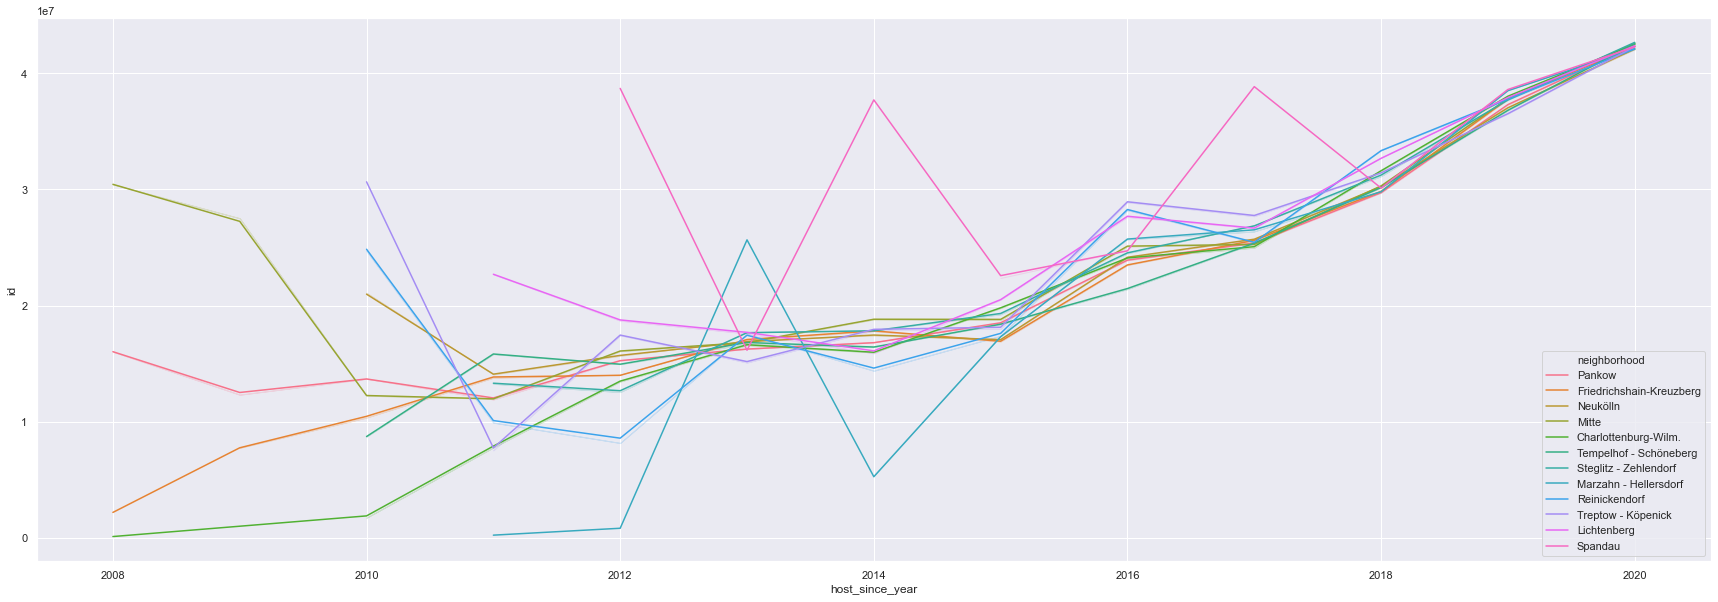

In [56]:
sns.set(rc={'figure.figsize': (30,10)})
sns.set_style('darkgrid')
sns.lineplot(x = 'host_since_year', y = 'id', data = df, hue = 'neighborhood', ci = False)



In [57]:
#Scatterplot of listing per neighborhood by year of initial listing

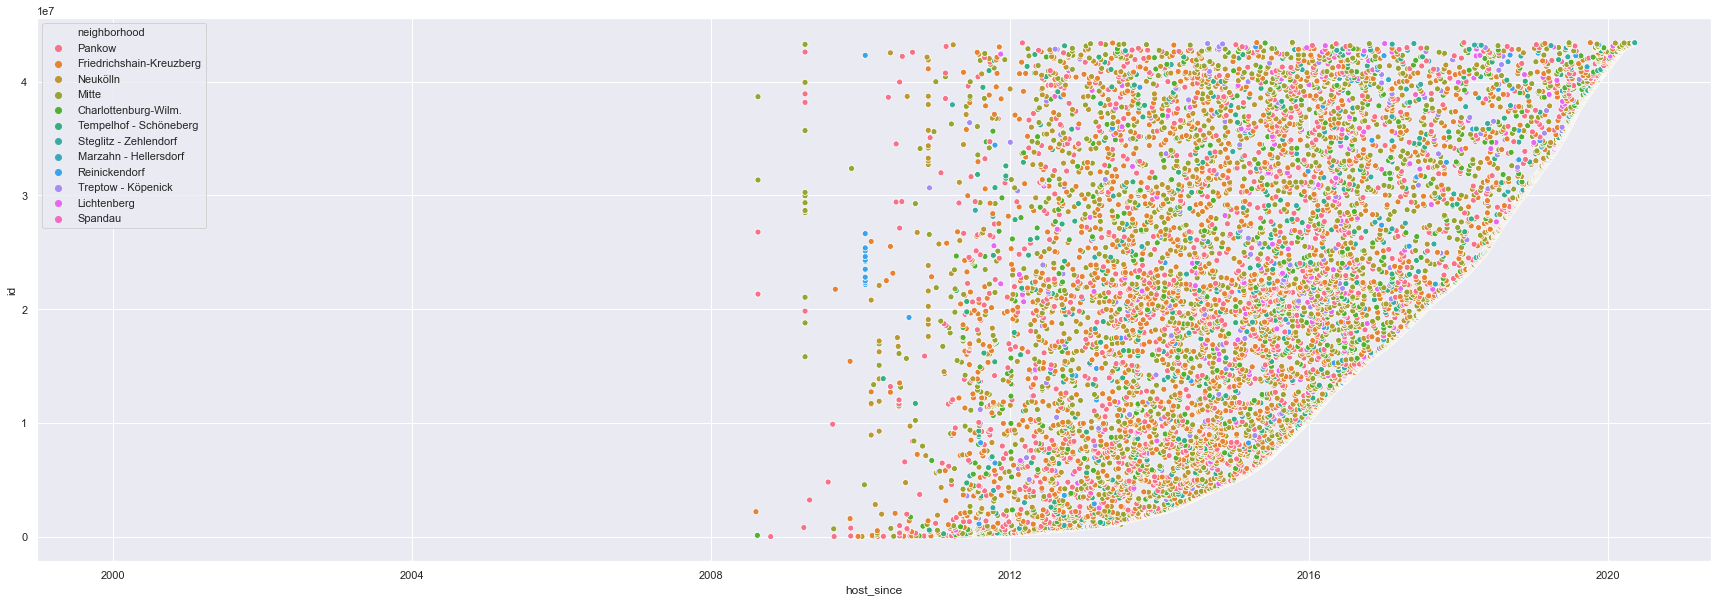

In [58]:
sns.set(rc={'figure.figsize': (30,10)})
sns.set_style('darkgrid')
sns.scatterplot(x = 'host_since', y = 'id', data = df, hue = 'neighborhood',)

In [59]:
# Total Listings by Neighborhood

Text(0, 0.5, 'Listings')

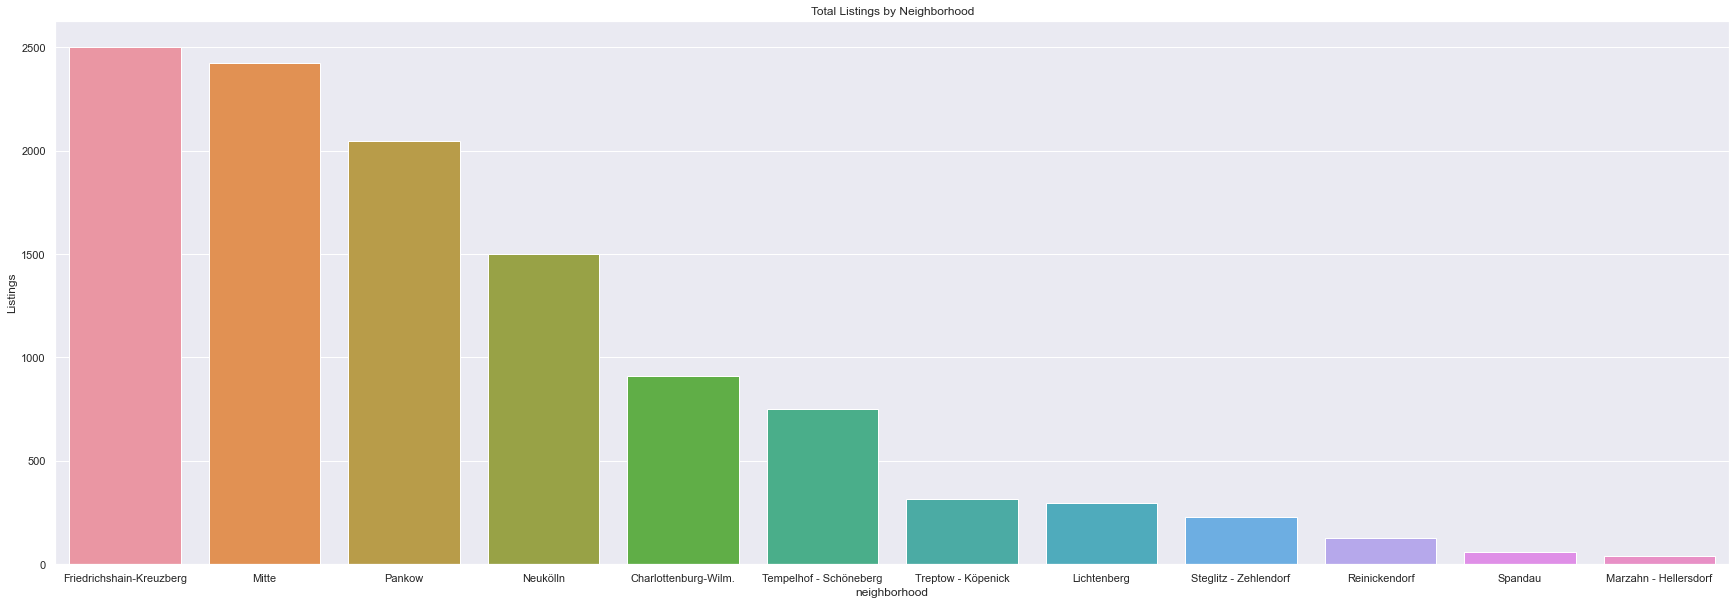

In [60]:
sns.set(rc={'figure.figsize': (30,10)})
ax = sns.barplot(neighborhood_total_listings.index, neighborhood_total_listings.sort_values(ascending = False), data = df, ci = False)
ax.set_title('Total Listings by Neighborhood')
ax.set_ylabel('Listings')

In [61]:
# Avg Price per Night by Neighborhood

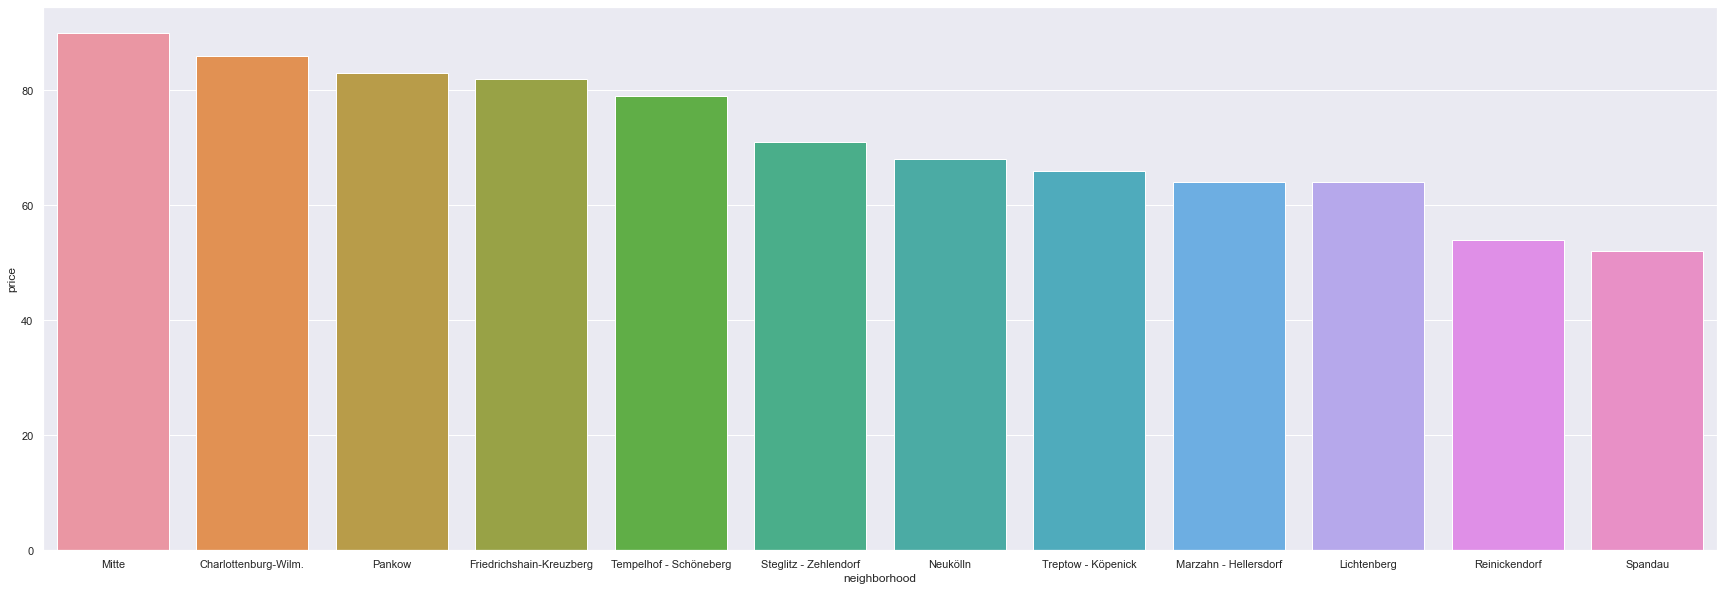

In [62]:
sns.set(rc={'figure.figsize': (30,10)})
bx = sns.barplot(neighborhood_mean_price.index, neighborhood_mean_price.sort_values(ascending=False), data = df, ci = False)

In [63]:
# Total listings by number of rooms

In [64]:
rooms = df.groupby('bedrooms')['id'].count()
rooms

bedrooms
0.0     1260
1.0     6513
2.0     2620
3.0      650
4.0      127
5.0       20
6.0        5
7.0        2
8.0        1
10.0       1
Name: id, dtype: int64

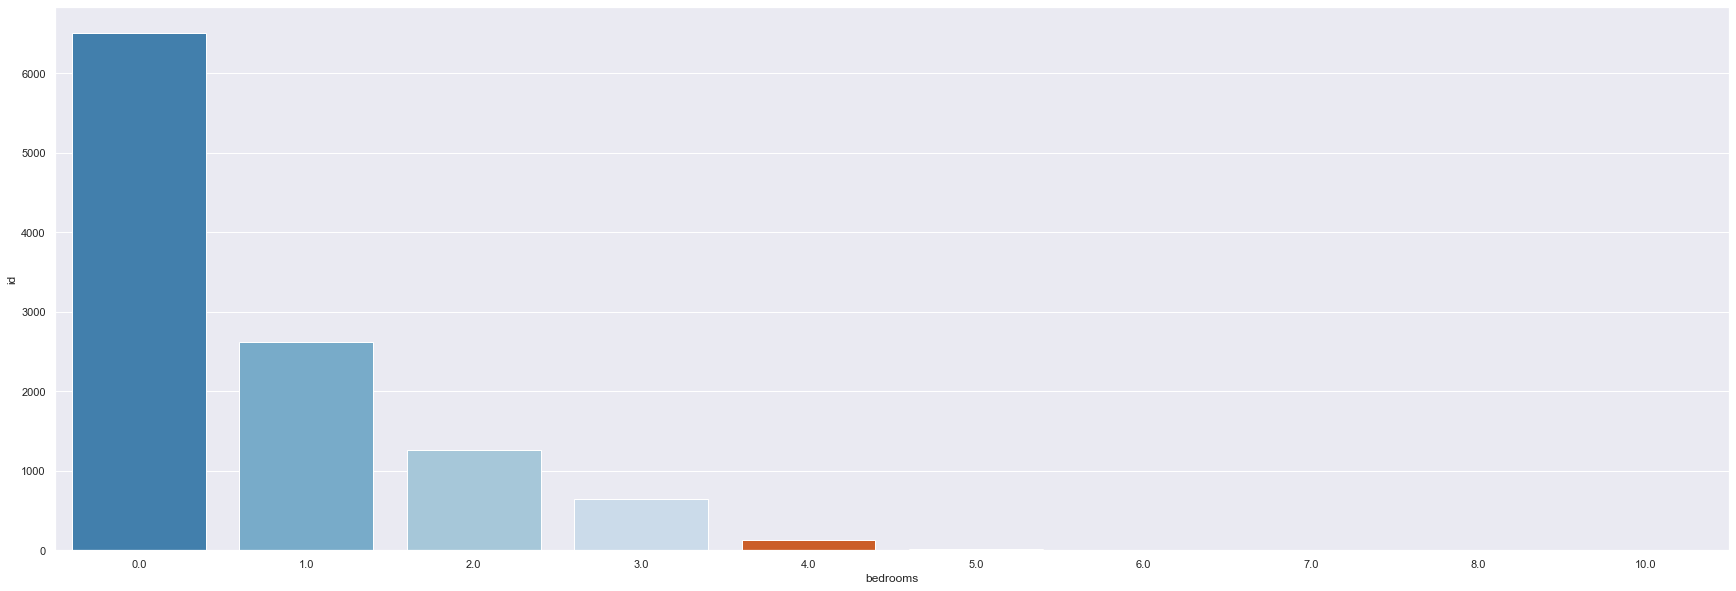

In [65]:
sns.barplot(rooms.index, rooms.sort_values(ascending = False), data = df, ci = False, palette= 'tab20c')

In [66]:
pd.crosstab(df['neighborhood'], df['property_type'])


property_type,Apartment
neighborhood,
Charlottenburg-Wilm.,912
Friedrichshain-Kreuzberg,2503
Lichtenberg,295
Marzahn - Hellersdorf,42
Mitte,2423
Neukölln,1501
Pankow,2047
Reinickendorf,125
Spandau,61


In [67]:
# Boxplot of price by neighborhood

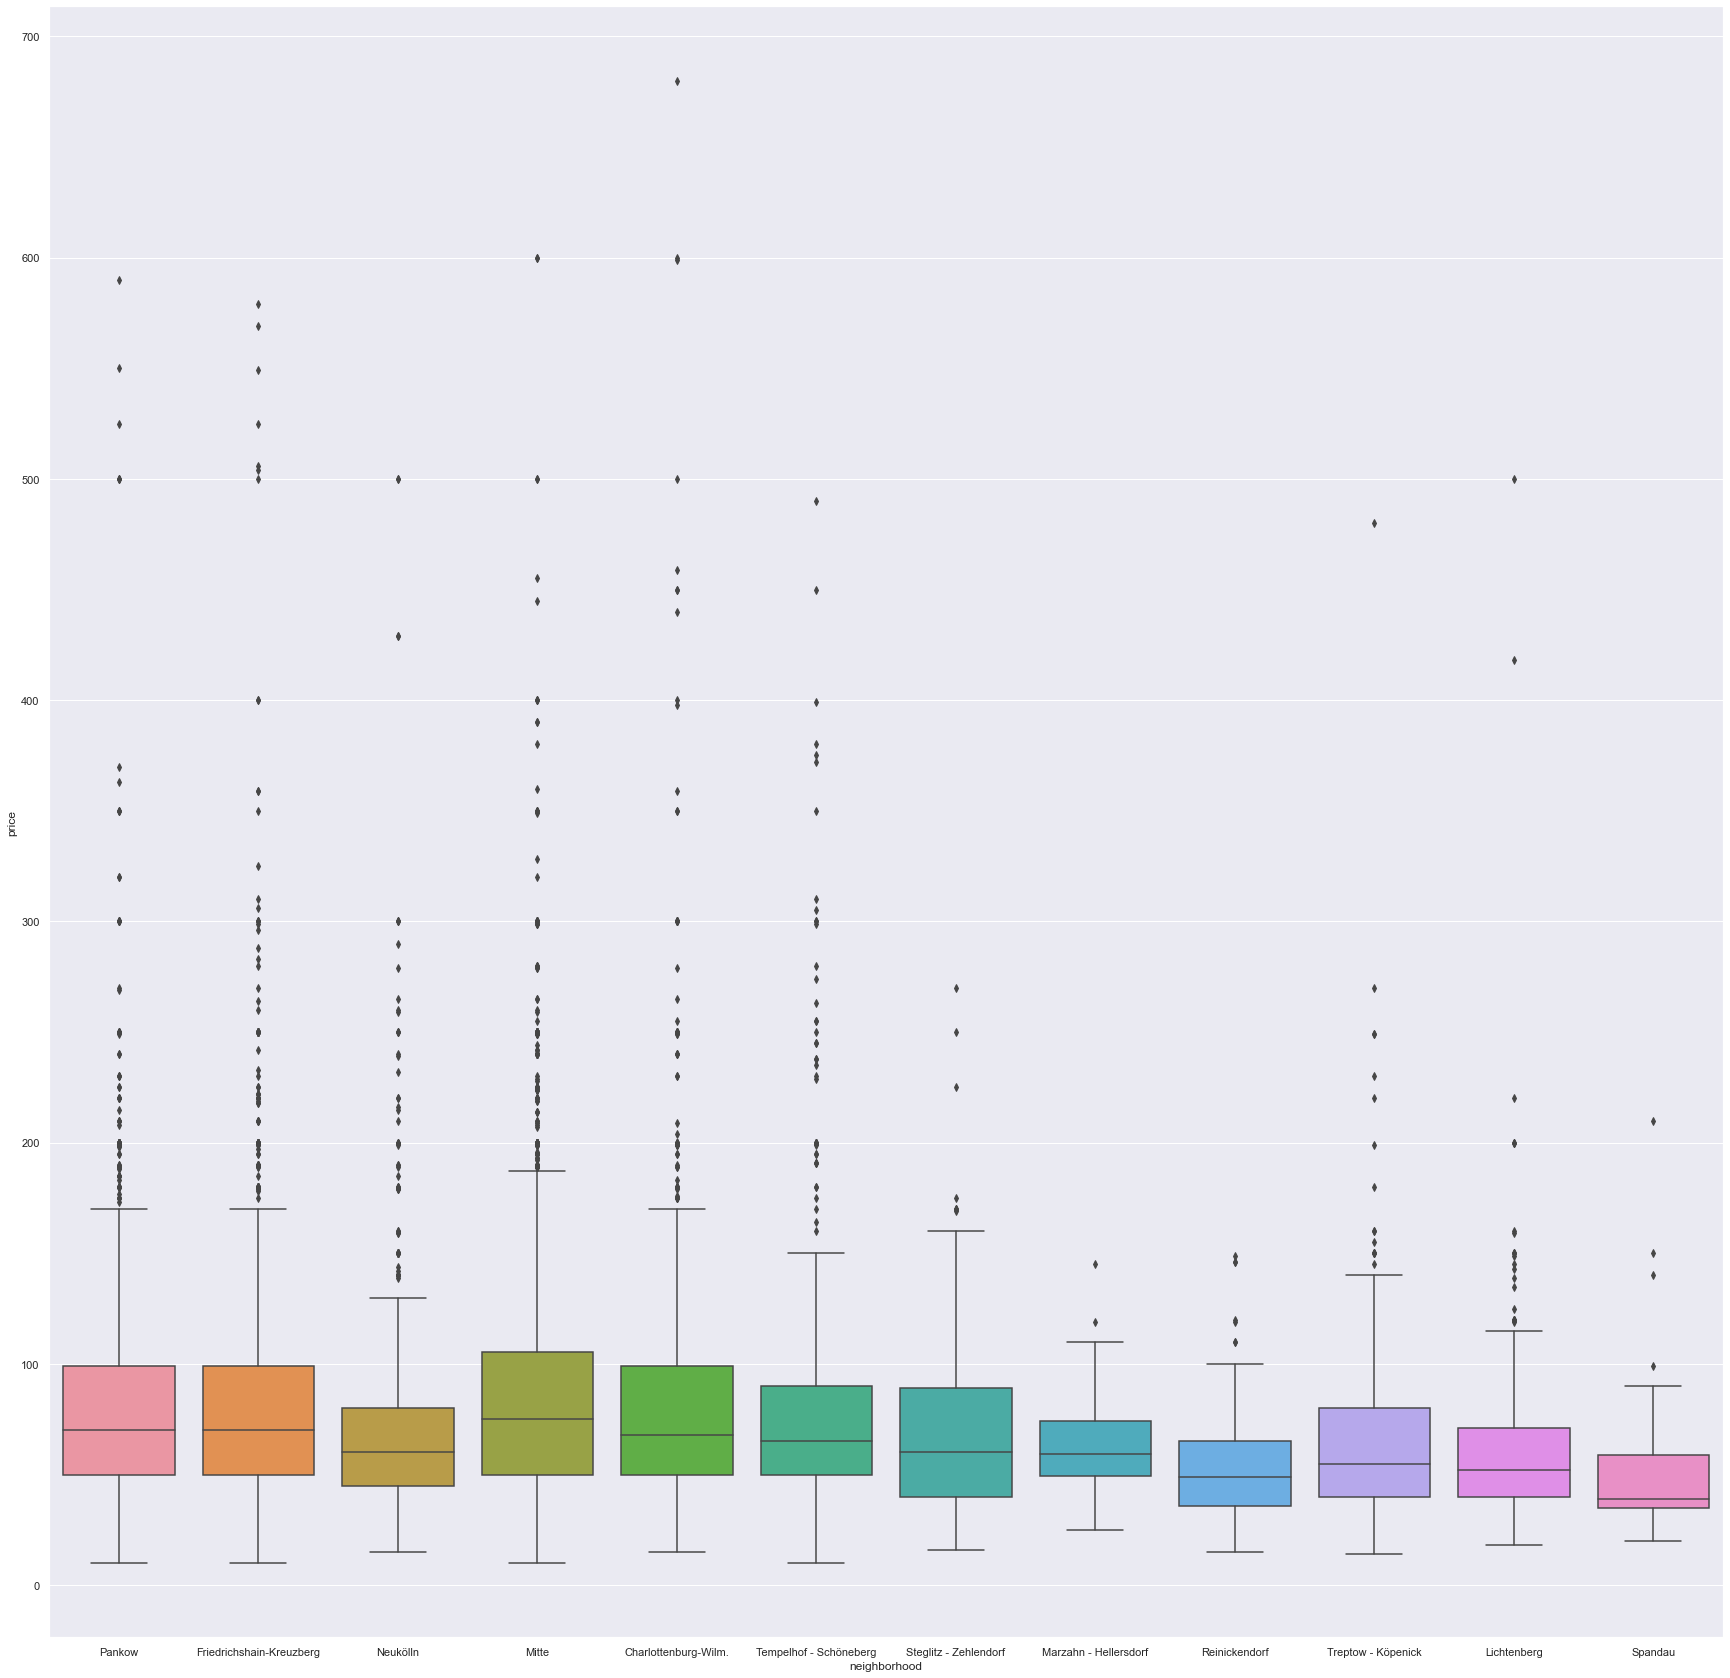

In [68]:
sns.set(rc={'figure.figsize': (30,30)})
sns.boxplot(y= 'price', x= 'neighborhood', data= df)

In [69]:
# Boxplot of bedrooms by neighborhood

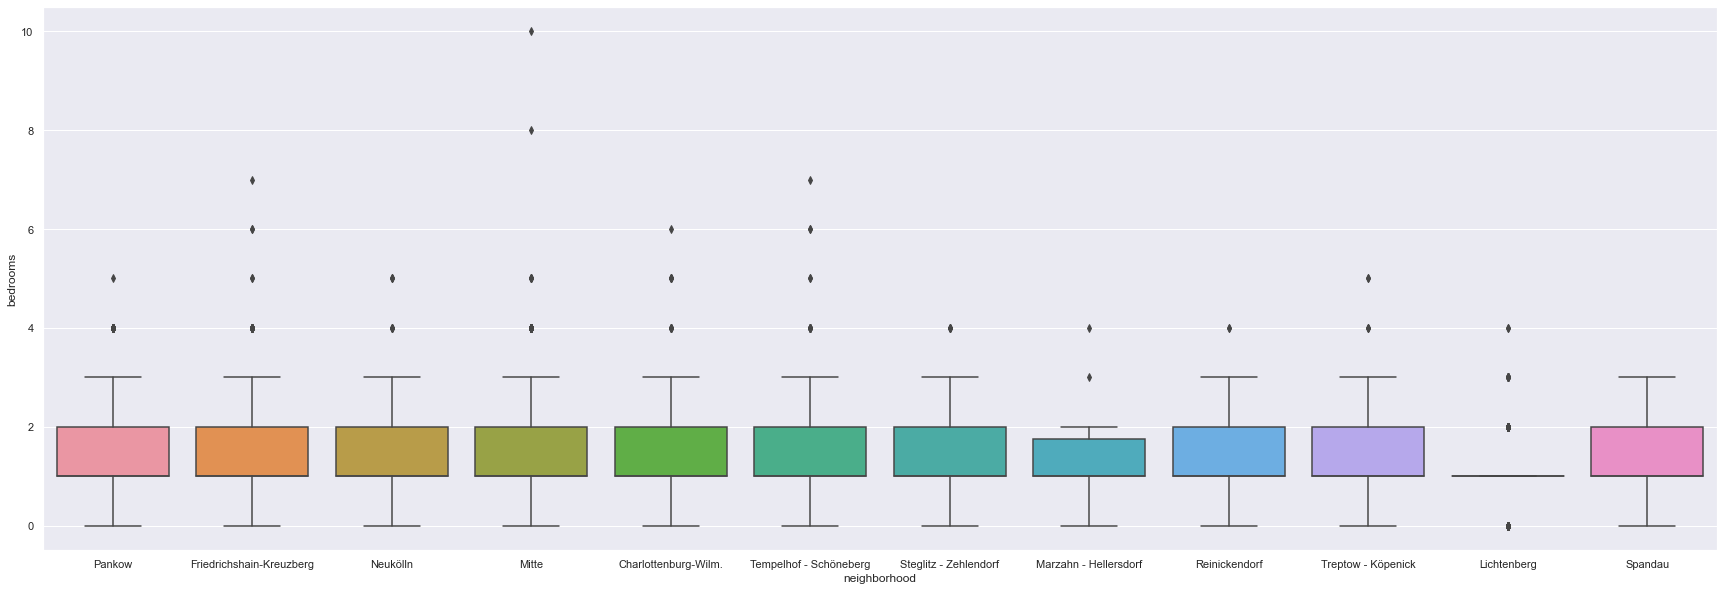

In [70]:
sns.set(rc={'figure.figsize': (30,10)})
sns.boxplot(y= 'bedrooms', x= 'neighborhood', data= df)

In [71]:
# Boxplot of bathrooms by neighborhood

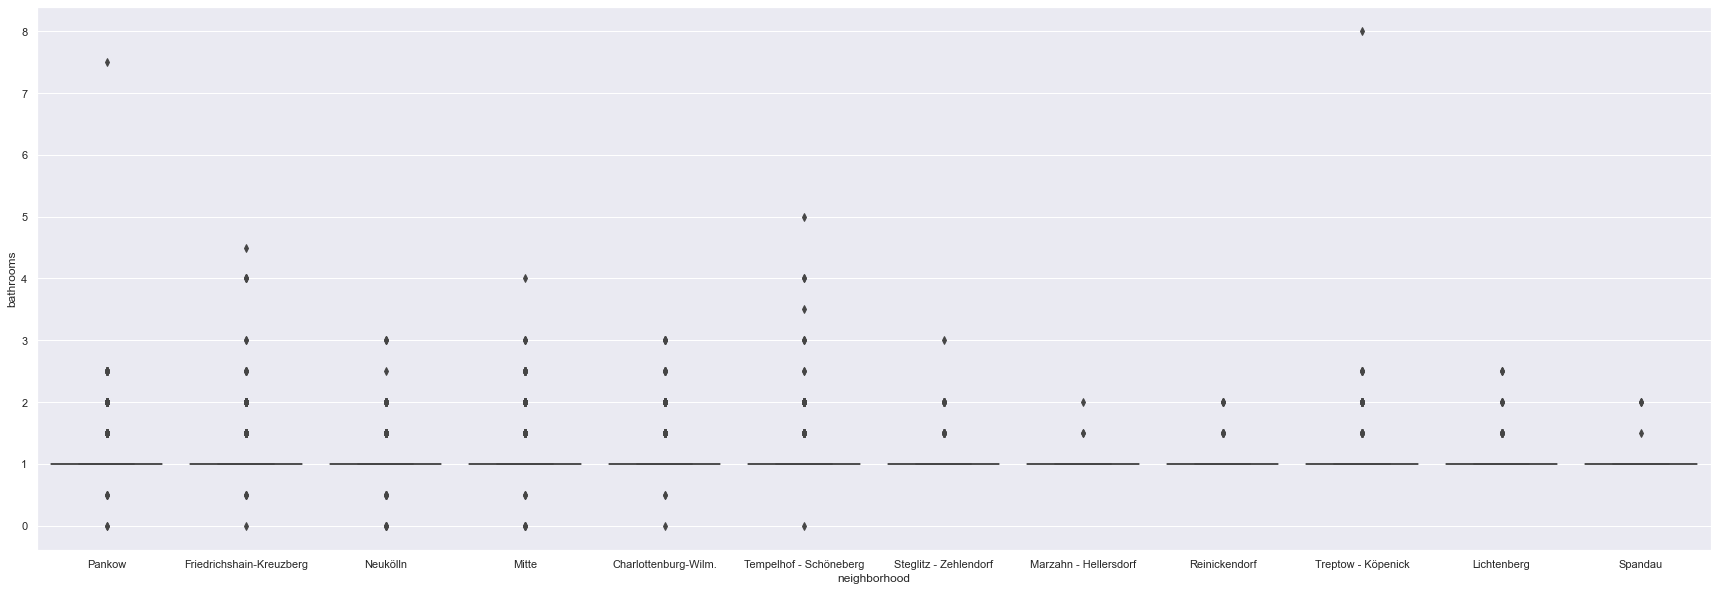

In [72]:
sns.set(rc={'figure.figsize': (30,10)})
sns.boxplot(y= 'bathrooms', x= 'neighborhood', data= df)

In [73]:
# Boxplot of distance_to_city_center by neighborhood

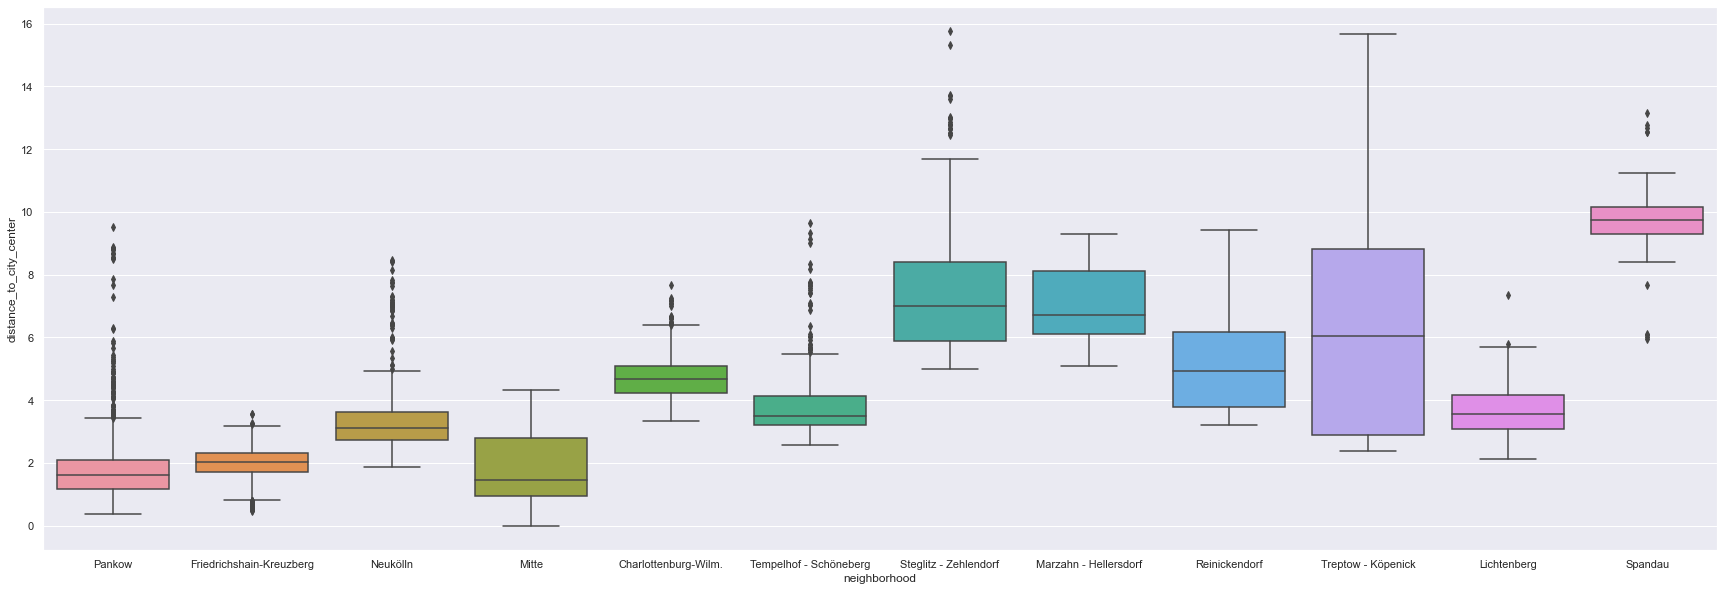

In [74]:
sns.set(rc={'figure.figsize': (30,10)})
sns.boxplot(y= 'distance_to_city_center', x= 'neighborhood', data= df)

In [75]:
# Scatterplot of distance_to_city_center by neighborhood

Text(0.5, 1.0, 'Distance to City Center by Price')

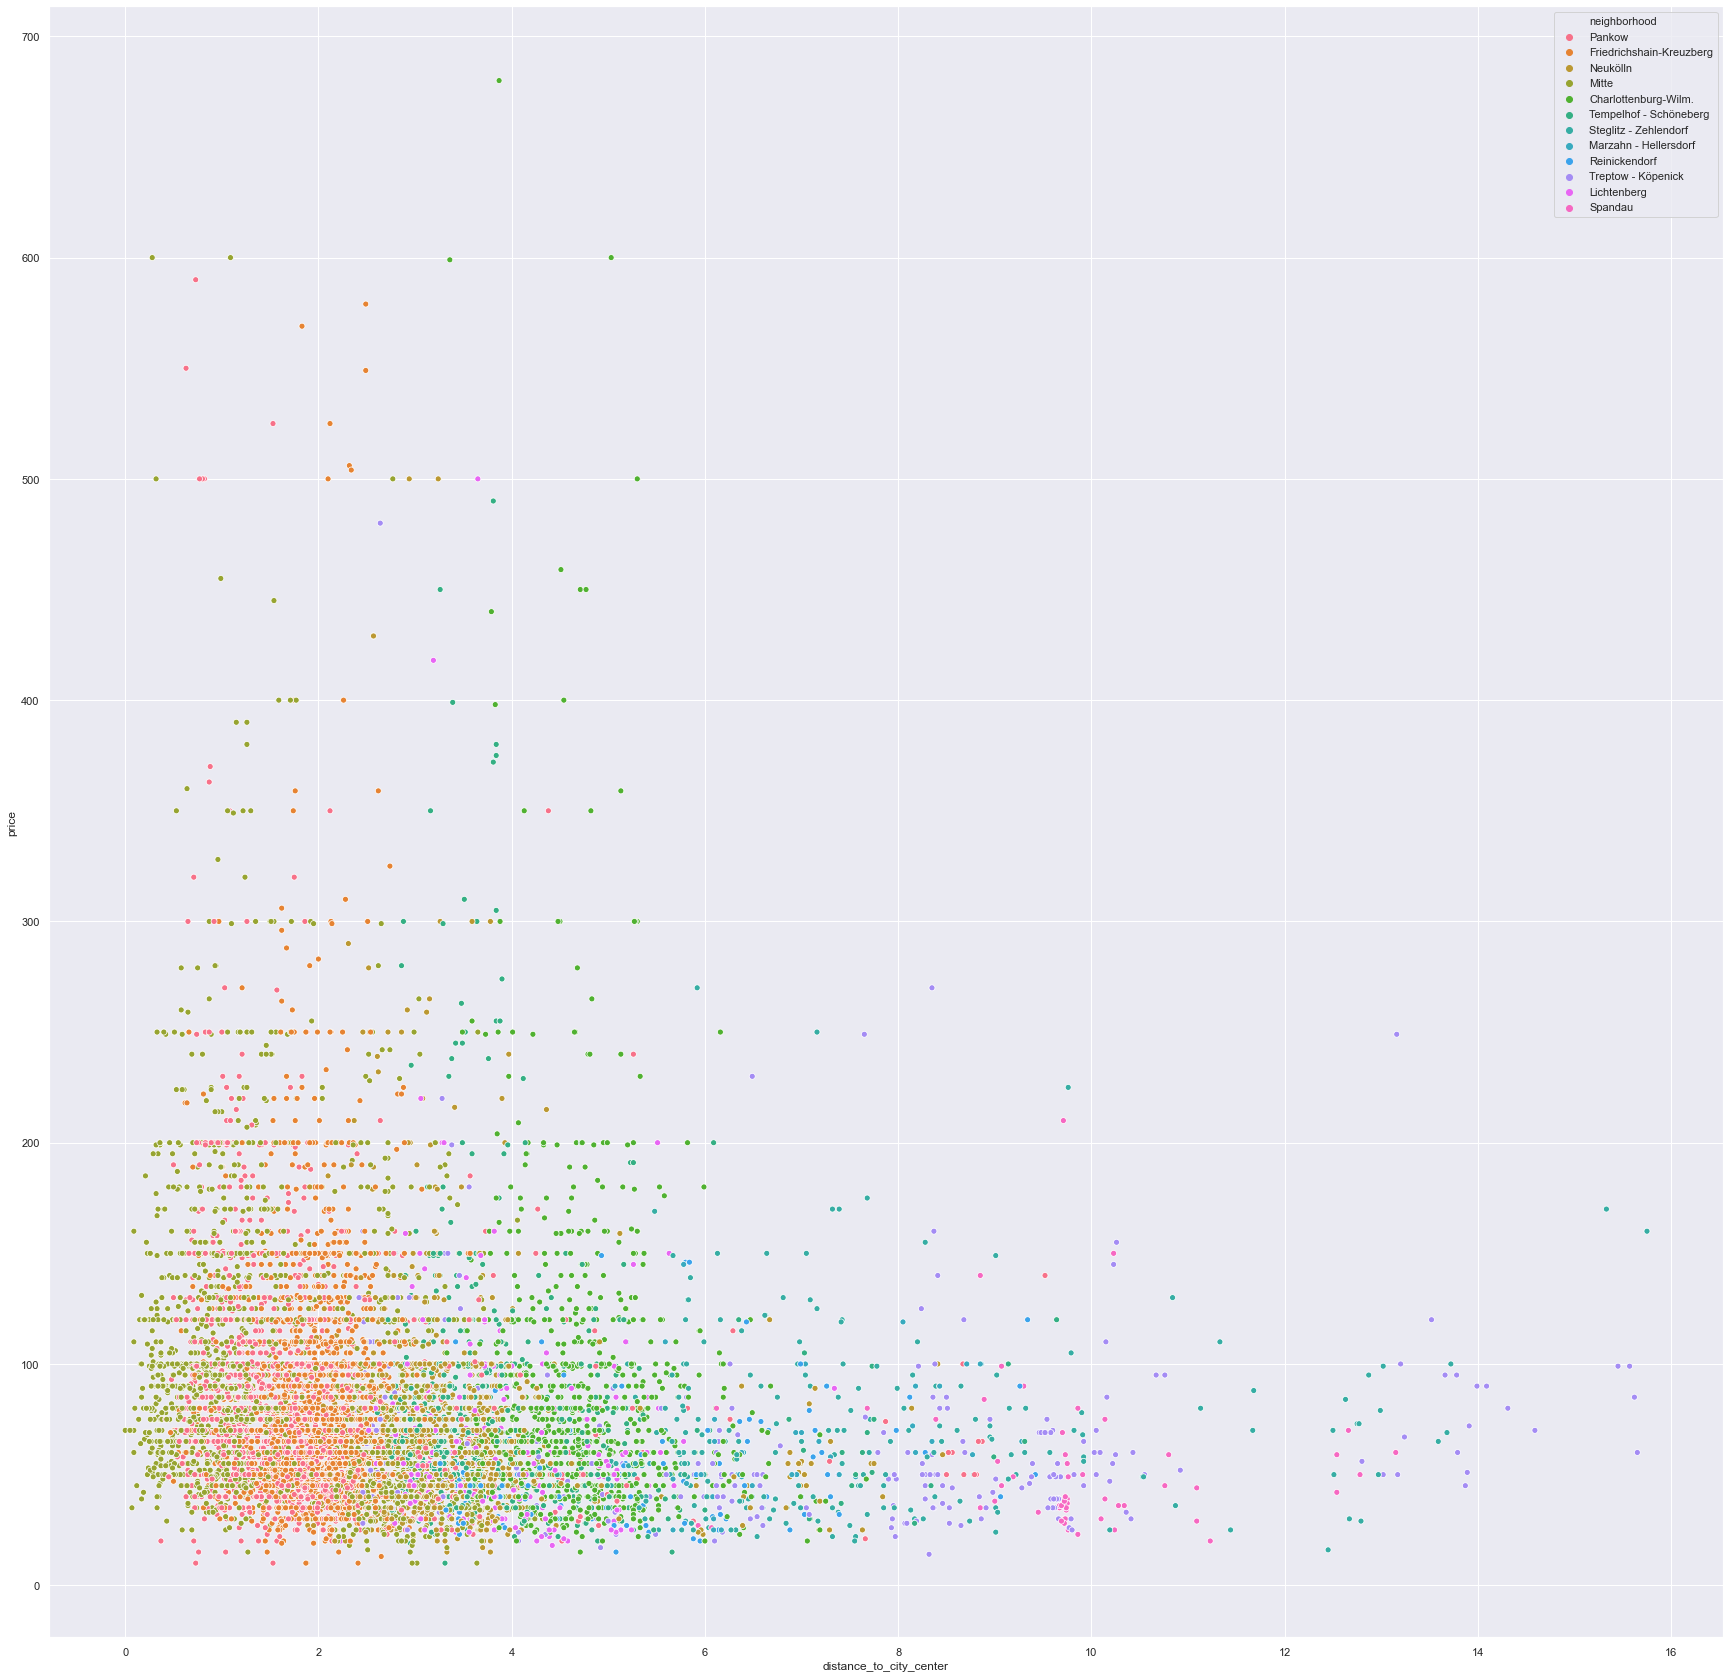

In [76]:
sns.set(rc={'figure.figsize': (30,30)})
sns.scatterplot(y= 'price', x= 'distance_to_city_center', hue= 'neighborhood', data= df)
ax.set_title('Distance to City Center by Price')
#ax.set(xlabel='Distance to City Center in Miles', ylabel='Price')
# ax.set_ylabel('Price')
# ax.set_xlabel('Distance to City Center in Miles')

In [79]:
df

,id,host_id,host_since,neighborhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,bed_type,guests_included,accommodates,price,host_since_year,property_lat_long,alexanderplatz_(city_center)_lat,alexanderplatz_(city_center)_long,alexanderplatz_(city_center)_lat_long,distance_to_city_center,hauptbahnhof_(central_station)_lat,hauptbahnhof_(central_station)_long,hauptbahnhof_(central_station)_lat_long,distance_to_central_station,tegel_(airport)_lat,tegel_(airport)_long,tegel_(airport)_lat_long,distance_to_airport
1,3176,3718,2008-10-19,Pankow,52.53500,13.41758,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,2,4,90.0,2008,"(52.535, 13.41758)",52.521918,13.413215,"(52.521918, 13.413215)",0.92,52.525084,13.369402,"(52.525084, 13.369402)",2.14,52.558833,13.288437,"(52.558833, 13.288437)",5.67
4,9991,33852,2009-08-25,Pankow,52.53303,13.41605,Apartment,Entire home/apt,2.5,4.0,7.0,Real Bed,5,7,180.0,2009,"(52.533030000000004, 13.41605)",52.521918,13.413215,"(52.521918, 13.413215)",0.78,52.525084,13.369402,"(52.525084, 13.369402)",2.04,52.558833,13.288437,"(52.558833, 13.288437)",5.65
5,14325,55531,2009-11-18,Pankow,52.54785,13.40556,Apartment,Entire home/apt,1.0,0.0,1.0,Real Bed,1,1,70.0,2009,"(52.54785, 13.405560000000001)",52.521918,13.413215,"(52.521918, 13.413215)",1.82,52.525084,13.369402,"(52.525084, 13.369402)",2.19,52.558833,13.288437,"(52.558833, 13.288437)",4.98
6,16644,64696,2009-12-20,Friedrichshain-Kreuzberg,52.50479,13.43510,Apartment,Entire home/apt,1.0,1.0,3.0,Real Bed,2,5,90.0,2009,"(52.50479, 13.4351)",52.521918,13.413215,"(52.521918, 13.413215)",1.50,52.525084,13.369402,"(52.525084, 13.369402)",3.10,52.558833,13.288437,"(52.558833, 13.288437)",7.21
7,17904,68997,2010-01-08,Neukölln,52.49548,13.42182,Apartment,Entire home/apt,1.0,0.0,0.0,Real Bed,1,2,49.0,2010,"(52.49548000000001, 13.42182)",52.521918,13.413215,"(52.521918, 13.413215)",1.86,52.525084,13.369402,"(52.525084, 13.369402)",3.01,52.558833,13.288437,"(52.558833, 13.288437)",7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24668,43412876,345964111,2020-05-11,Steglitz - Zehlendorf,52.43271,13.33569,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,1,3,45.0,2020,"(52.43271, 13.33569)",52.521918,13.413215,"(52.521918, 13.413215)",6.97,52.525084,13.369402,"(52.525084, 13.369402)",6.54,52.558833,13.288437,"(52.558833, 13.288437)",8.94
24669,43413603,300691014,2019-10-07,Friedrichshain-Kreuzberg,52.51118,13.47330,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,1,2,45.0,2019,"(52.51118, 13.4733)",52.521918,13.413215,"(52.521918, 13.413215)",2.63,52.525084,13.369402,"(52.525084, 13.369402)",4.47,52.558833,13.288437,"(52.558833, 13.288437)",8.44
24671,43420670,170172470,2018-01-27,Pankow,52.54171,13.40592,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,1,2,75.0,2018,"(52.541709999999995, 13.405920000000002)",52.521918,13.413215,"(52.521918, 13.413215)",1.40,52.525084,13.369402,"(52.525084, 13.369402)",1.92,52.558833,13.288437,"(52.558833, 13.288437)",5.08
24673,43422635,31667990,2015-04-21,Friedrichshain-Kreuzberg,52.50169,13.43058,Apartment,Entire home/apt,1.0,2.0,3.0,Real Bed,1,4,65.0,2015,"(52.50169, 13.430579999999999)",52.521918,13.413215,"(52.521918, 13.413215)",1.58,52.525084,13.369402,"(52.525084, 13.369402)",3.04,52.558833,13.288437,"(52.558833, 13.288437)",7.16


In [80]:
# Assign the rows with top-5 neighborhoods to df2

In [81]:
index_hoods = df[(df['neighborhood'] != 'Mitte') & (df['neighborhood'] != 'Pankow') & (df['neighborhood'] !='Friedrichshain-Kreuzberg') 
                 & (df['neighborhood'] != 'Neukölln') & (df['neighborhood'] != 'Charlottenburg-Wilm.')].index

df2 = df.drop(index_hoods)
df2

,id,host_id,host_since,neighborhood,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,bed_type,guests_included,accommodates,price,host_since_year,property_lat_long,alexanderplatz_(city_center)_lat,alexanderplatz_(city_center)_long,alexanderplatz_(city_center)_lat_long,distance_to_city_center,hauptbahnhof_(central_station)_lat,hauptbahnhof_(central_station)_long,hauptbahnhof_(central_station)_lat_long,distance_to_central_station,tegel_(airport)_lat,tegel_(airport)_long,tegel_(airport)_lat_long,distance_to_airport
1,3176,3718,2008-10-19,Pankow,52.53500,13.41758,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,2,4,90.0,2008,"(52.535, 13.41758)",52.521918,13.413215,"(52.521918, 13.413215)",0.92,52.525084,13.369402,"(52.525084, 13.369402)",2.14,52.558833,13.288437,"(52.558833, 13.288437)",5.67
4,9991,33852,2009-08-25,Pankow,52.53303,13.41605,Apartment,Entire home/apt,2.5,4.0,7.0,Real Bed,5,7,180.0,2009,"(52.533030000000004, 13.41605)",52.521918,13.413215,"(52.521918, 13.413215)",0.78,52.525084,13.369402,"(52.525084, 13.369402)",2.04,52.558833,13.288437,"(52.558833, 13.288437)",5.65
5,14325,55531,2009-11-18,Pankow,52.54785,13.40556,Apartment,Entire home/apt,1.0,0.0,1.0,Real Bed,1,1,70.0,2009,"(52.54785, 13.405560000000001)",52.521918,13.413215,"(52.521918, 13.413215)",1.82,52.525084,13.369402,"(52.525084, 13.369402)",2.19,52.558833,13.288437,"(52.558833, 13.288437)",4.98
6,16644,64696,2009-12-20,Friedrichshain-Kreuzberg,52.50479,13.43510,Apartment,Entire home/apt,1.0,1.0,3.0,Real Bed,2,5,90.0,2009,"(52.50479, 13.4351)",52.521918,13.413215,"(52.521918, 13.413215)",1.50,52.525084,13.369402,"(52.525084, 13.369402)",3.10,52.558833,13.288437,"(52.558833, 13.288437)",7.21
7,17904,68997,2010-01-08,Neukölln,52.49548,13.42182,Apartment,Entire home/apt,1.0,0.0,0.0,Real Bed,1,2,49.0,2010,"(52.49548000000001, 13.42182)",52.521918,13.413215,"(52.521918, 13.413215)",1.86,52.525084,13.369402,"(52.525084, 13.369402)",3.01,52.558833,13.288437,"(52.558833, 13.288437)",7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24667,43408185,271235180,2019-06-25,Mitte,52.52993,13.39291,Apartment,Entire home/apt,1.0,2.0,2.0,Real Bed,1,4,63.0,2019,"(52.52993000000001, 13.39291)",52.521918,13.413215,"(52.521918, 13.413215)",1.02,52.525084,13.369402,"(52.525084, 13.369402)",1.04,52.558833,13.288437,"(52.558833, 13.288437)",4.82
24669,43413603,300691014,2019-10-07,Friedrichshain-Kreuzberg,52.51118,13.47330,Apartment,Entire home/apt,1.0,1.0,2.0,Real Bed,1,2,45.0,2019,"(52.51118, 13.4733)",52.521918,13.413215,"(52.521918, 13.413215)",2.63,52.525084,13.369402,"(52.525084, 13.369402)",4.47,52.558833,13.288437,"(52.558833, 13.288437)",8.44
24671,43420670,170172470,2018-01-27,Pankow,52.54171,13.40592,Apartment,Entire home/apt,1.0,1.0,1.0,Real Bed,1,2,75.0,2018,"(52.541709999999995, 13.405920000000002)",52.521918,13.413215,"(52.521918, 13.413215)",1.40,52.525084,13.369402,"(52.525084, 13.369402)",1.92,52.558833,13.288437,"(52.558833, 13.288437)",5.08
24673,43422635,31667990,2015-04-21,Friedrichshain-Kreuzberg,52.50169,13.43058,Apartment,Entire home/apt,1.0,2.0,3.0,Real Bed,1,4,65.0,2015,"(52.50169, 13.430579999999999)",52.521918,13.413215,"(52.521918, 13.413215)",1.58,52.525084,13.369402,"(52.525084, 13.369402)",3.04,52.558833,13.288437,"(52.558833, 13.288437)",7.16


In [82]:
df2.neighborhood.value_counts()

Friedrichshain-Kreuzberg    2503
Mitte                       2423
Pankow                      2047
Neukölln                    1501
Charlottenburg-Wilm.         912
Name: neighborhood, dtype: int64

In [83]:
# Reassign df2 only with the dependent variable and independent variables for testing

In [84]:
df2 = df2[['price', 'neighborhood', 'bathrooms', 'bedrooms', 'distance_to_city_center']]

In [85]:
# Scatter matrix of variables to test

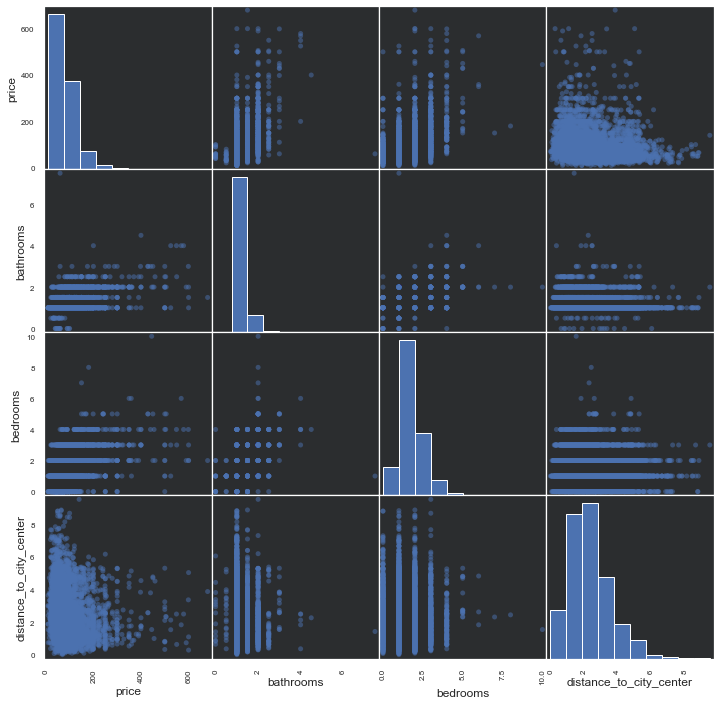

In [86]:
scatter_matrix(df2, figsize=(12, 12), s=100)
plt.show()

In [87]:
# Create train and test dataframes 

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = df2[['neighborhood', 'bathrooms', 'bedrooms', 'distance_to_city_center']]

In [90]:
y = df2['price']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [92]:
df2_train = pd.concat([X_train, y_train], axis = 1)
df2_train

,neighborhood,bathrooms,bedrooms,distance_to_city_center,price
7687,Friedrichshain-Kreuzberg,1.0,1.0,2.08,78.0
18385,Pankow,1.0,0.0,2.06,50.0
2869,Friedrichshain-Kreuzberg,1.0,1.0,1.75,49.0
12992,Pankow,1.0,3.0,2.11,120.0
384,Neukölln,1.0,1.0,2.88,60.0
...,...,...,...,...,...
24113,Mitte,1.0,1.0,2.96,40.0
20304,Charlottenburg-Wilm.,2.0,3.0,4.13,350.0
4375,Pankow,1.0,1.0,2.64,34.0
14598,Pankow,1.0,1.0,1.55,80.0


In [93]:
df2_test = pd.concat([X_test, y_test], axis = 1)
df2_test

,neighborhood,bathrooms,bedrooms,distance_to_city_center,price
12070,Neukölln,1.0,1.0,3.72,50.0
4549,Friedrichshain-Kreuzberg,1.0,1.0,2.62,40.0
5119,Friedrichshain-Kreuzberg,2.0,1.0,1.74,70.0
4084,Friedrichshain-Kreuzberg,1.0,1.0,2.94,26.0
9782,Friedrichshain-Kreuzberg,1.5,1.0,2.15,77.0
...,...,...,...,...,...
23513,Friedrichshain-Kreuzberg,1.0,1.0,1.79,80.0
334,Neukölln,1.0,2.0,3.19,86.0
17971,Charlottenburg-Wilm.,1.0,1.0,3.91,75.0
23923,Mitte,1.0,1.0,1.26,150.0


In [94]:
# Run Ordinary Least Square (ols) model test on df2_train

In [95]:
linear_model = smf.ols(formula = 'price ~ neighborhood + bathrooms + bedrooms + distance_to_city_center', data=df2_train).fit()

linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     572.1
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:38:54   Log-Likelihood:                -38896.
No. Observations:                7508   AIC:                         7.781e+04
Df Residuals:                    7500   BIC:                         7.786e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   32.6867      3.727      8.770      0.000      25.380      39.993
neighborhood[T.Friedrichshain-Kreuzberg]   -26.4596      2.441    -10.840      0.000     -31.244     -21.675
neighborhood[T.Mitte]                      -21.0901      2.512     -8.397      0.000     -26.013     -16.167
neighborhood[T.Neukölln]                   -24.9052      2.202    -11.311      0.000     -29.222     -20.589
neighborhood[T.Pankow]                     -29.6961      2.555    -11.623      0.000     -34.704     -24.688
bathrooms                                   59.3041      1.880     31.542      0.000      55.618      62.990
bedrooms                                    21.9766      0.680     32.342      0.000      20.645      23.309
distance_to_city_center                     -8.5444      0.585    -14.601      0.000      -9.692      -7.397
==============================================================================
Omnibus:                     4993.416   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153781.382
Skew:                           2.737   Prob(JB):                         0.00
Kurtosis:                      24.485   Cond. No.                         36.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Check Accuracy of r2_score

In [97]:
from sklearn.metrics import r2_score

In [98]:
linear_model.params

Intercept                                   32.686716
neighborhood[T.Friedrichshain-Kreuzberg]   -26.459627
neighborhood[T.Mitte]                      -21.090082
neighborhood[T.Neukölln]                   -24.905232
neighborhood[T.Pankow]                     -29.696068
bathrooms                                   59.304081
bedrooms                                    21.976593
distance_to_city_center                     -8.544439
dtype: float64

In [99]:
y_test_pred = linear_model.predict(X_test)

In [100]:
y_test_pred 

12070     57.276846
4549      65.121334
5119     131.944521
4084      62.387114
9782      98.789261
            ...    
23513     72.213218
334       83.781992
17971     80.558635
23923     82.111315
865      131.945616
Length: 1878, dtype: float64

In [101]:
y_test

12070     50.0
4549      40.0
5119      70.0
4084      26.0
9782      77.0
         ...  
23513     80.0
334       86.0
17971     75.0
23923    150.0
865      130.0
Name: price, Length: 1878, dtype: float64

In [102]:
r2_score(y_test, y_test_pred)

0.3421412106071643

In [104]:
#df.to_csv(r'~/desktop/ttp2/capstone_4/berlin_10_19_20.csv')